<div style="text-align: center;">
  <span style="font-size: 30px;">Tugas Pertemuan Ke 4 Matkul Artifisial Intelejen</span><br>
  <span style="font-size: 24px;">Penerapan Algoritma Machine Learning untuk Prediksi Tren Ketenagakerjaan di Indonesia Pasca-COVID-19</span><br>




<div style="text-align: left;">
  <span style="font-size: 17px;">Nama   : Muhamad Fajri Permana Haryanto</span><br>
  <span style="font-size: 17px;">Nim    : 20220801439 </span>
</div>


**untuk algoritma yang saya gunakan:**
1. Decision Tree Classification
2. ARIMA (AutoRegressive Integrated Moving Average)
3. Random Forest Regression
4. SARIMA (Seasonal AutoRegressive Integrated Moving Average)



**untuk data set dan liblary yang saya pakai dan analisis:**

In [53]:
# Daftar pustaka yang dipakai
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import train_test_split

# Daftar data yang saya pakaiiii
data = {
    'Tahun': ['Feb-12', 'Feb-13', 'Feb-14', 'Feb-15', 'Feb-16', 'Feb-17', 'Feb-18', 'Sep-19', 'Feb-20', 'Feb-21', 'Feb-22', 'Feb-23', 'Feb-24'],
    'Pencari Kerja Terdaftar - Laki-Laki': [1641719, 1640662, 1665379, 2005963, 2209192, 2362634, 2347831, 177170, 245081, 5027948, 2642646, 2830000, 1061870],
    'Pencari Kerja Terdaftar - Perempuan': [ 860681, 872088, 871046, 897731, 953762, 979313, 974493, 167884, 251834, 3564307, 1887841, 2200000, 757960],
    'Lowongan Kerja Terdaftar - Laki-Laki': [ 174882, 155813, 162732, 206145, 205500, 183270, 184648, 78499, 124079, 2201354, 165005, 198000, 132469],
    'Lowongan Kerja Terdaftar - Perempuan': [111190, 102587, 96739, 96243, 81163, 104752, 89578, 102472, 141498, 1279887, 80050, 90000, 84503],
    'Penempatan/Pemenuhan Tenaga Kerja - Laki-Laki': [ 166908, 153679, 157286, 162497, 148127,  169978, 171567, 49212, 53033, 1834462,  82000, 156000, 182967],
    'Penempatan/Pemenuhan Tenaga Kerja - Perempuan': [76151, 73677, 68045, 64200, 61478, 74878, 72185, 58050, 73461, 1066572, 60000, 68000, 124959],
}


df = pd.DataFrame(data)

display(df)


,Tahun,Pencari Kerja Terdaftar - Laki-Laki,Pencari Kerja Terdaftar - Perempuan,Lowongan Kerja Terdaftar - Laki-Laki,Lowongan Kerja Terdaftar - Perempuan,Penempatan/Pemenuhan Tenaga Kerja - Laki-Laki,Penempatan/Pemenuhan Tenaga Kerja - Perempuan
0,Feb-12,1641719,860681,174882,111190,166908,76151
1,Feb-13,1640662,872088,155813,102587,153679,73677
2,Feb-14,1665379,871046,162732,96739,157286,68045
3,Feb-15,2005963,897731,206145,96243,162497,64200
4,Feb-16,2209192,953762,205500,81163,148127,61478
5,Feb-17,2362634,979313,183270,104752,169978,74878
6,Feb-18,2347831,974493,184648,89578,171567,72185
7,Sep-19,177170,167884,78499,102472,49212,58050
8,Feb-20,245081,251834,124079,141498,53033,73461
9,Feb-21,5027948,3564307,2201354,1279887,1834462,1066572


**1. Perbandingan Jumlah Pencari Kerja (Laki-Laki vs Perempuan) menggunakan algoritma Decision Tree Classification**

Digunakan untuk membedakan antara jumlah pencari kerja laki-laki dan perempuan, dan menghasilkan visualisasi perbandingan dalam bentuk diagram batang.

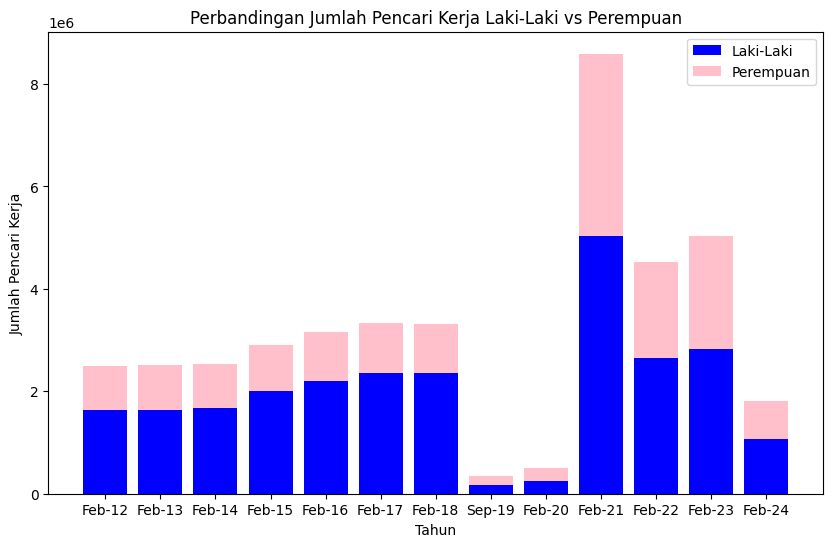

In [54]:
# Data yang diseleksi yaaa
X = df[['Pencari Kerja Terdaftar - Laki-Laki', 'Pencari Kerja Terdaftar - Perempuan']]
y = (df['Pencari Kerja Terdaftar - Laki-Laki'] > df['Pencari Kerja Terdaftar - Perempuan']).astype(int)  # 1 jika Laki-Laki lebih banyak, 0 jika tidak

# Membagi data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat Model algoritmanya
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

# Visualisasi
plt.figure(figsize=(10, 6))
plt.bar(df['Tahun'], df['Pencari Kerja Terdaftar - Laki-Laki'], color='blue', label='Laki-Laki')
plt.bar(df['Tahun'], df['Pencari Kerja Terdaftar - Perempuan'], color='pink', label='Perempuan', bottom=df['Pencari Kerja Terdaftar - Laki-Laki'])
plt.title('Perbandingan Jumlah Pencari Kerja Laki-Laki vs Perempuan')
plt.ylabel('Jumlah Pencari Kerja')
plt.xlabel('Tahun')
plt.legend()
plt.savefig('perbandingan_pencari_kerja_dt.png')
plt.show()


**berikut analisi dari diagram batangnya**
(perbandigan jumlah pencari kerja terdaftar antara laki laki dan perempuan)

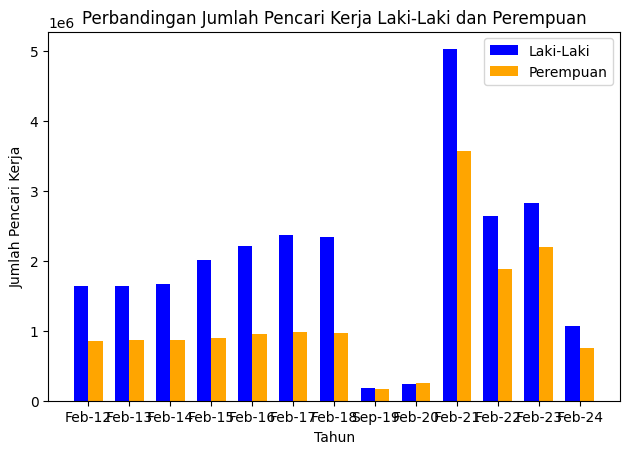

In [55]:
# Plotting tahun ya
bar_width = 0.35
index = range(len(df['Tahun']))

# Membuat diagram batang
plt.bar(index, df['Pencari Kerja Terdaftar - Laki-Laki'], bar_width, label='Laki-Laki', color='blue')
plt.bar([i + bar_width for i in index], df['Pencari Kerja Terdaftar - Perempuan'], bar_width, label='Perempuan', color='orange')

# Menambahkan label dan judul biar mudah dipahamin
plt.xlabel('Tahun')
plt.ylabel('Jumlah Pencari Kerja')
plt.title('Perbandingan Jumlah Pencari Kerja Laki-Laki dan Perempuan')
plt.xticks([i + bar_width / 2 for i in index], df['Tahun'])
plt.legend()

# visualisasi
plt.tight_layout()
plt.show()

**2. Statistik Ketenagakerjaan dan Prediksi (2025-2026) menggunakan
Algoritma ARIMA (AutoRegressive Integrated Moving Average)**

Model ini digunakan untuk menganalisis data historis dan memprediksi jumlah pencari kerja, jumlah lowongan kerja dan penempatan/keterima kerja di masa mendatang (2025-2026).

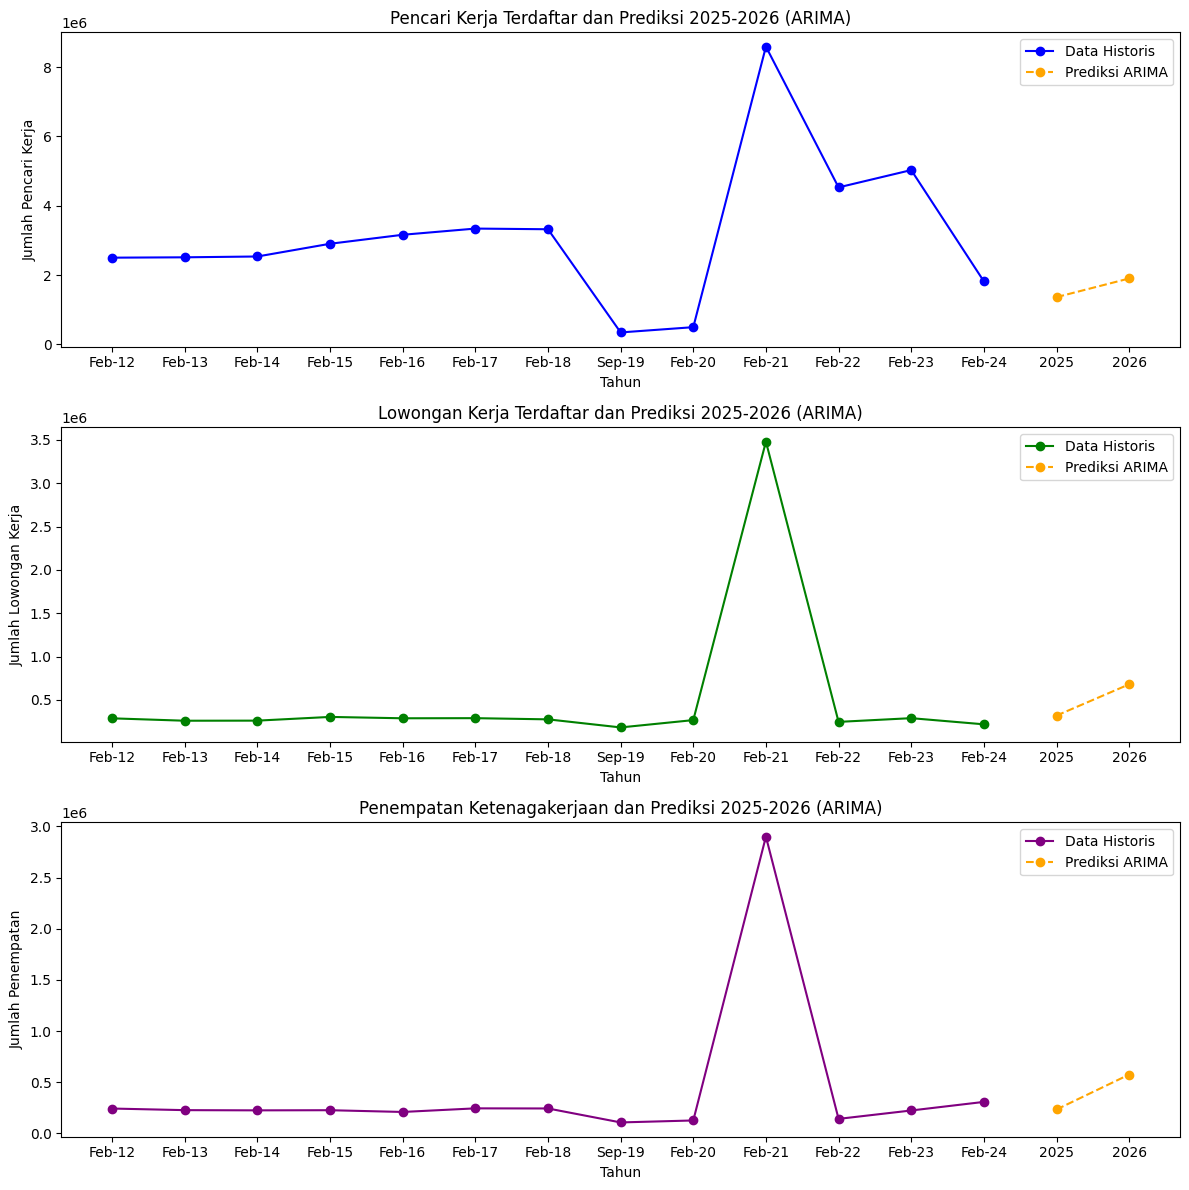

In [56]:
import warnings
warnings.filterwarnings("ignore")


# Menambahkan kolom jumlah total
df['Pencari Kerja Terdaftar - Jumlah'] = df['Pencari Kerja Terdaftar - Laki-Laki'] + df['Pencari Kerja Terdaftar - Perempuan']
df['Lowongan Kerja Terdaftar - Jumlah'] = df['Lowongan Kerja Terdaftar - Laki-Laki'] + df['Lowongan Kerja Terdaftar - Perempuan']
df['Penempatan - Jumlah'] = df['Penempatan/Pemenuhan Tenaga Kerja - Laki-Laki'] + df['Penempatan/Pemenuhan Tenaga Kerja - Perempuan']

# Mengubah tahun menjadi indeks numerik untuk analisis waktu
df['Tahun_Numerik'] = np.arange(len(df))

# Model ARIMA ya
model_arima_pencari = ARIMA(df['Pencari Kerja Terdaftar - Jumlah'], order=(2, 1, 2))
model_arima_fit_pencari = model_arima_pencari.fit()
model_arima_lowongan = ARIMA(df['Lowongan Kerja Terdaftar - Jumlah'], order=(2, 1, 2))
model_arima_fit_lowongan = model_arima_lowongan.fit()
model_arima_penempatan = ARIMA(df['Penempatan - Jumlah'], order=(2, 1, 2))
model_arima_fit_penempatan = model_arima_penempatan.fit()

# Prediksi untuk 2025-2026
predictions_arima_pencari = model_arima_fit_pencari.forecast(steps=2)
predictions_arima_lowongan = model_arima_fit_lowongan.forecast(steps=2)
predictions_arima_penempatan = model_arima_fit_penempatan.forecast(steps=2)

# Menambahkan prediksi ke DataFrame
predicted_years = ['2025', '2026']
predicted_values_pencari = np.append(df['Pencari Kerja Terdaftar - Jumlah'].values, predictions_arima_pencari)
predicted_values_lowongan = np.append(df['Lowongan Kerja Terdaftar - Jumlah'].values, predictions_arima_lowongan)
predicted_values_penempatan = np.append(df['Penempatan - Jumlah'].values, predictions_arima_penempatan)

# Visualisasi Grafik Garis
plt.figure(figsize=(12, 12))

# Grafik Pencari Kerja Terdaftar
plt.subplot(3, 1, 1)
plt.plot(df['Tahun'], df['Pencari Kerja Terdaftar - Jumlah'], label='Data Historis', color='blue', marker='o')
plt.plot(predicted_years, predictions_arima_pencari, label='Prediksi ARIMA', color='orange', linestyle='--', marker='o')
plt.title('Pencari Kerja Terdaftar dan Prediksi 2025-2026 (ARIMA)')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Pencari Kerja')
plt.legend()

# Grafik Lowongan Kerja Terdaftar
plt.subplot(3, 1, 2)
plt.plot(df['Tahun'], df['Lowongan Kerja Terdaftar - Jumlah'], label='Data Historis', color='green', marker='o')
plt.plot(predicted_years, predictions_arima_lowongan, label='Prediksi ARIMA', color='orange', linestyle='--', marker='o')
plt.title('Lowongan Kerja Terdaftar dan Prediksi 2025-2026 (ARIMA)')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Lowongan Kerja')
plt.legend()

# Grafik Penempatan
plt.subplot(3, 1, 3)
plt.plot(df['Tahun'], df['Penempatan - Jumlah'], label='Data Historis', color='purple', marker='o')
plt.plot(predicted_years, predictions_arima_penempatan, label='Prediksi ARIMA', color='orange', linestyle='--', marker='o')
plt.title('Penempatan Ketenagakerjaan dan Prediksi 2025-2026 (ARIMA)')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Penempatan')
plt.legend()

# visualisasi akhir
plt.tight_layout()
plt.savefig('prediksi_ketenagakerjaan_arima.png')
plt.show()

**3. Prediksi Keterimaan Kerja selama 2019-2024**

**A. Algoritma Machine Learning: Random Forest Regression**

Digunakan untuk memprediksi presentasi keterimaan kerja berdasarkan jumlah pencari kerja terdaftar laki-laki dan perempuan.

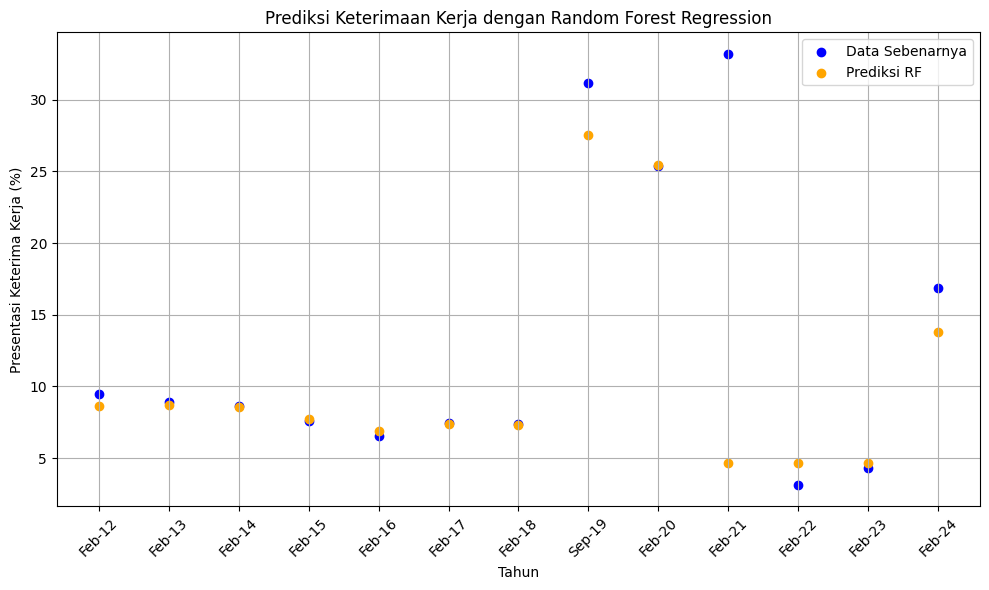

In [57]:

# Menghitung persentase keterima kerja untuk masing-masing jenis kelamin
df['Keterima - Laki-Laki (%)'] = (df['Penempatan/Pemenuhan Tenaga Kerja - Laki-Laki'] / df['Pencari Kerja Terdaftar - Laki-Laki']) * 100
df['Keterima - Perempuan (%)'] = (df['Penempatan/Pemenuhan Tenaga Kerja - Perempuan'] / df['Pencari Kerja Terdaftar - Perempuan']) * 100

# Menambahkan persentase keterima gabungan (laki-laki dan perempuan)
df['Presentasi Keterima Kerja'] = (df['Keterima - Laki-Laki (%)'] + df['Keterima - Perempuan (%)']) / 2

# Data untuk Random Forest
X_rf = df[['Pencari Kerja Terdaftar - Laki-Laki', 'Pencari Kerja Terdaftar - Perempuan']]
y_rf = df['Presentasi Keterima Kerja']

# Membagi data menjadi train dan test
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

# buat model algo random Forest Regressor
model_rf = RandomForestRegressor(n_estimators=100)
model_rf.fit(X_train_rf, y_train_rf)

# Prediksi untuk semua data  untuk visualisasi
y_pred_rf_all = model_rf.predict(X_rf)  

# Visualisasi hasil prediksi dengan diagram scatter
plt.figure(figsize=(10, 6))
plt.scatter(df['Tahun'], df['Presentasi Keterima Kerja'], label='Data Sebenarnya', color='blue')
plt.scatter(df['Tahun'], y_pred_rf_all, label='Prediksi RF', color='orange') 
plt.title('Prediksi Keterimaan Kerja dengan Random Forest Regression')
plt.ylabel('Presentasi Keterima Kerja (%)')
plt.xlabel('Tahun')
plt.xticks(rotation=45)  
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('prediksi_keterimaan_rf.png')
plt.show()


**kalau inih Analisis Statistik: Diagram Batang biar mudah dipahami (opsional)**

Menampilkan presentasi keterima kerja dari tahun 2012 hingga 2024.

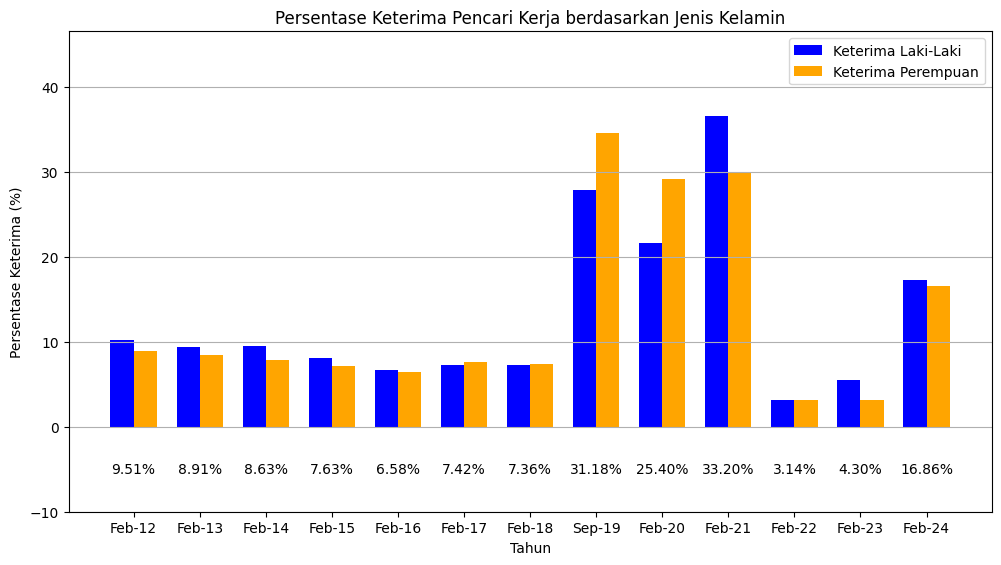

In [58]:
# Hitung persentase penempatan
df['Keterima - Laki-Laki (%)'] = (df['Penempatan/Pemenuhan Tenaga Kerja - Laki-Laki'] / df['Pencari Kerja Terdaftar - Laki-Laki']) * 100
df['Keterima - Perempuan (%)'] = (df['Penempatan/Pemenuhan Tenaga Kerja - Perempuan'] / df['Pencari Kerja Terdaftar - Perempuan']) * 100

# Hitung total persentase keterima gabungan
df['Keterima Gabungan (%)'] = (df['Keterima - Laki-Laki (%)'] + df['Keterima - Perempuan (%)']) / 2

# Buat diagram batang
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(df['Tahun']))

# Plot datanya 
plt.bar(index, df['Keterima - Laki-Laki (%)'], bar_width, label='Keterima Laki-Laki', color='blue')
plt.bar([i + bar_width for i in index], df['Keterima - Perempuan (%)'], bar_width, label='Keterima Perempuan', color='orange')

# Tambahkan total keterima gabungan di bawah batang
for i in index:
    plt.text(i + bar_width / 2, -5, f"{df['Keterima Gabungan (%)'][i]:.2f}%", ha='center', va='center', fontsize=10)

# tambahin keterangan biar mudah
plt.xlabel('Tahun')
plt.ylabel('Persentase Keterima (%)')
plt.title('Persentase Keterima Pencari Kerja berdasarkan Jenis Kelamin')
plt.xticks([i + bar_width / 2 for i in index], df['Tahun'])
plt.legend()
plt.grid(axis='y')

# visualisasi
plt.tight_layout()
plt.ylim(-10, max(df['Keterima - Laki-Laki (%)'].max(), df['Keterima - Perempuan (%)'].max()) + 10)  # Atur batas y agar ada ruang untuk teks
plt.show()

**4. Prediksi Ketersediaan Lowongan Kerja untuk 2025-2026 menggunakan Algoritma SARIMA (Seasonal ARIMA)**

Model ini digunakan untuk memprediksi ketersediaan lowongan kerja untuk tahun 2025-2026, dengan mempertimbangkan faktor musiman dalam data historis.

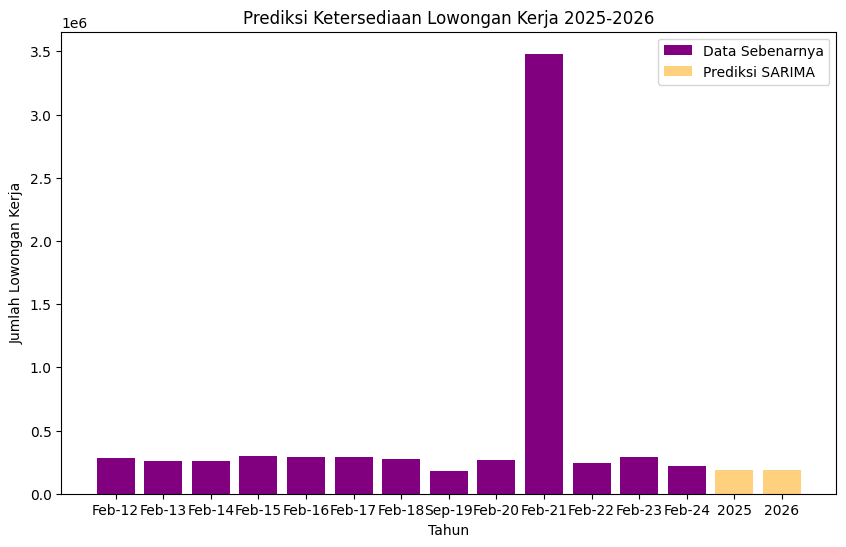

In [59]:
#tambahkan kolom data (disinih pakai yang pencari lowongan kerja)
df['Lowongan Kerja Terdaftar - Jumlah'] = df['Lowongan Kerja Terdaftar - Laki-Laki'] + df['Lowongan Kerja Terdaftar - Perempuan']
from statsmodels.tsa.statespace.sarimax import SARIMAX


from statsmodels.tsa.statespace.sarimax import SARIMAX

# buat Model SARIMA sama ajah kaya ARIMA 
model_sarima = SARIMAX(df['Lowongan Kerja Terdaftar - Jumlah'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_sarima_fit = model_sarima.fit()

# Prediksi untuk 2025-2026
predictions_sarima = model_sarima_fit.forecast(steps=2)

# Visualisasi
plt.figure(figsize=(10, 6))
plt.bar(df['Tahun'], df['Lowongan Kerja Terdaftar - Jumlah'], color='purple', label='Data Sebenarnya')
plt.bar(['2025', '2026'], predictions_sarima, color='orange', alpha=0.5, label='Prediksi SARIMA')
plt.title('Prediksi Ketersediaan Lowongan Kerja 2025-2026')
plt.ylabel('Jumlah Lowongan Kerja')
plt.xlabel('Tahun')
plt.legend()
plt.savefig('prediksi_lowongan_kerja_sarima.png')
plt.show()
